## Covid19 analysis practice of Coursera guided project
### 1. Prepare data sources for analysis
### 2. Finding measure from covid19 dataset to establish analysis. 
### 3. Prepare World happiness dataset and merge two datasets 
### 4. finding correlations among the data 
### 5. Making visualization from analysis using Seaborn



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#### Importing covid19 dataset

In [2]:
#import covid19_Comfirmed_dataset.csv
covid_dataset = pd.read_csv("../input/covid19/covid19_Confirmed_dataset.csv")
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#check shape of the Dataframe
covid_dataset.shape

(266, 104)

### : Drop irrelavant column

In [4]:
#delete irrelevant column 
covid_dataset.drop(["Lat","Long"],axis=1,inplace=True)
covid_dataset.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### :  Aggregating the rows by each country

In [5]:
covid_dataset_aggregated = covid_dataset.groupby("Country/Region").sum()
covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
#check rows, column
# result is 187 countries and 100 attributes
covid_dataset_aggregated.shape

(187, 100)

### : Visualizing data for better understand of the data. Let's check for China and Thailand.

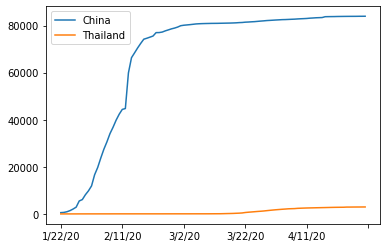

In [7]:

covid_dataset_aggregated.loc["China"].plot()
covid_dataset_aggregated.loc["Thailand"].plot()
plt.legend()


<AxesSubplot:>

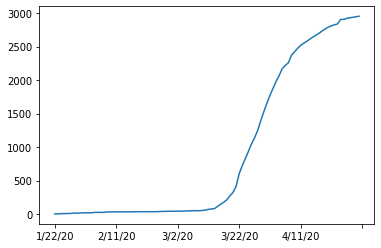

In [8]:
covid_dataset_aggregated.loc["Thailand"].plot()

### Calculating a good measure 
##### find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot:>

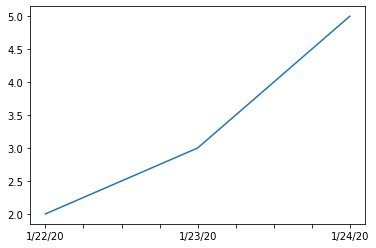

In [9]:
#let's see first 3 days of pandamic
covid_dataset_aggregated.loc["Thailand"][:3].plot()

<AxesSubplot:>

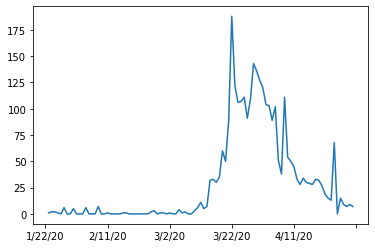

In [10]:
#calculating and ploting the first derivative of the curve
covid_dataset_aggregated.loc["Thailand"].diff().plot()

## find maxmimum infection rate for Thailand, China, Spain

In [11]:
covid_dataset_aggregated.loc["Thailand"].diff().max()

188.0

In [12]:
covid_dataset_aggregated.loc["China"].diff().max()

15136.0

In [13]:
covid_dataset_aggregated.loc["Spain"].diff().max()

9630.0

## find maxmimum infection rate for all of the countries

In [14]:
countries = list(covid_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_dataset_aggregated.loc[c].diff().max())
covid_dataset_aggregated["max_infection_rate"] = max_infection_rates
#create max infection of countries column

In [15]:
#check max infection column
covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [16]:
#create a dataframe with max infection column only.
corona_data = pd.DataFrame(covid_dataset_aggregated["max_infection_rate"])


In [17]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Importing the dataset

In [18]:
# importing the dataset
world_happiness_csv = pd.read_csv("../input/covid19/worldwide_happiness_report.csv")

In [19]:
world_happiness_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [20]:
# drop irrelevant column
useless_cols = ["Overall rank", "Score", "Generosity","Perceptions of corruption"]

In [21]:
world_happiness_csv.drop(useless_cols,axis=1,inplace=True)
world_happiness_csv.head()


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Change the indices of dataframe

In [22]:
# change the indices of the dataframe using df.set_index()
world_happiness_csv.set_index("Country or region", inplace=True)
world_happiness_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


## Join two datasets

In [23]:
# corana data
corona_data.shape

(187, 1)

In [24]:
# world happiness report data
world_happiness_csv.shape

(156, 4)

In [25]:
# rows of corona data is higher so using inner join 
df = corona_data.join(world_happiness_csv,how='inner')
df.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


## : Correlation Matrix

In [26]:
#Find Correlation
df.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


## : Visualization using Seaborn
#### visualize the analysis results into graphs

In [27]:
df.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

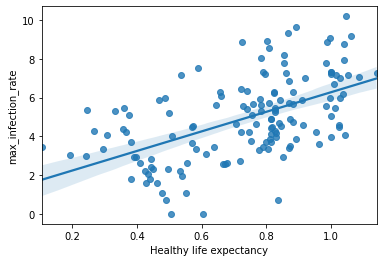

In [28]:
#### Plotting Healthy life expectancy vs maximum infection rate
x = df["Healthy life expectancy"]
y = df["max_infection_rate"]
sns.regplot(x,np.log(y))

### Plotting GDP vs maximum Infection rate

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

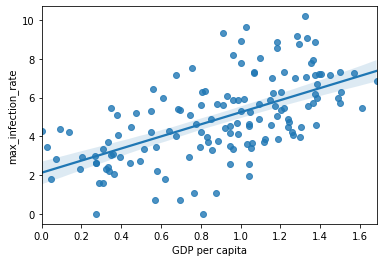

In [29]:
x = df["GDP per capita"]
y = df["max_infection_rate"]
sns.regplot(x,np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

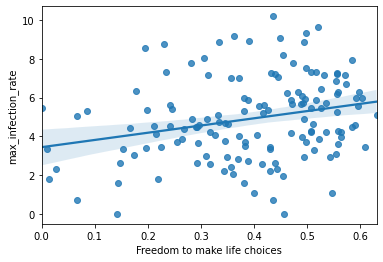

In [30]:
x = df["Freedom to make life choices"]
y = df["max_infection_rate"]
sns.regplot(x,np.log(y))